In [1]:
import numpy as np
import matplotlib.pyplot as plt

# problem 1

# PCA and Text Models

In [2]:
#Q1

In [3]:
data1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 100)
data2 = np.random.multivariate_normal([0,0], [[1,-.9],[-.9,1]], 100)

<function matplotlib.pyplot.show(close=None, block=None)>

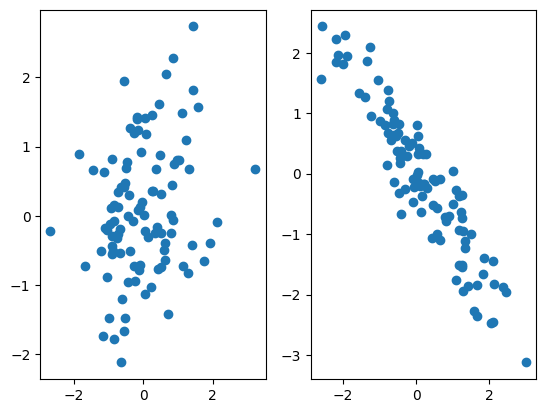

In [4]:
fig,axs = plt.subplots(1,2)
axs[0].scatter(data1[:,0], data1[:,1])
axs[1].scatter(data2[:,0], data2[:,1])
plt.show

In [5]:
# Just from the graph, I think the correlation of data1 is very weak between x and y 
#hence the r value will be less

In [6]:
# Just from the graph, I think the correlation of data2 is very strong between x and y 
#hence the r value will be high

In [7]:
#Q2

In [8]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.decomposition import PCA

In [10]:
mypca = PCA(n_components = 2)

In [11]:
myXprinc = mypca.fit(data1)

In [12]:
myXprinc.explained_variance_ratio_

array([0.62945328, 0.37054672])

In [13]:
#Q3
# Higher

In [14]:
#Q4

In [15]:
mypca1 = PCA(n_components = 2)

In [16]:
myXprinc1 = mypca.fit(data2)

In [17]:
myXprinc1.explained_variance_ratio_

array([0.96538399, 0.03461601])

In [18]:
#Q5

In [19]:
pc = myXprinc1.components_[0]

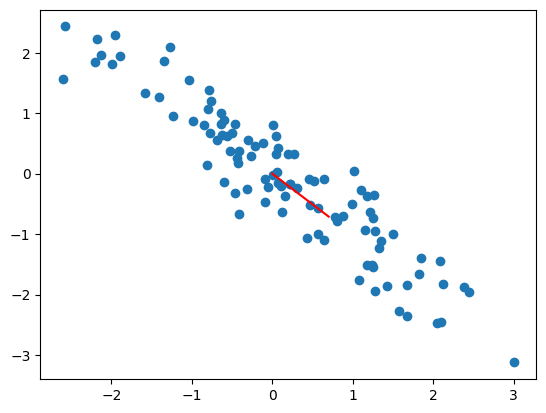

In [20]:
plt.scatter(data2[:,0],data2[:,1])
plt.plot([0,pc[0]],[0,pc[1]], c = 'red')

# Problem 2

In [1]:
import pandas as pd
data = pd.read_csv("CNotesCS323_1/imdb-dataset.csv")

In [96]:
sent = data.loc[:,'sentiment']

In [97]:
mystring = data.loc[:,'review']

In [98]:
mystring

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [25]:
mystring[:] = mystring[:].apply(lambda x: x.lower())

In [26]:
mystring

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [27]:
import re

In [28]:
mystring[:] = mystring[:].apply(lambda x: re.sub('<[^>]*>','',x))

In [29]:
mystring[:] = mystring[:].apply(lambda x: re.sub('\.|,|\(|\)|\?|\'|\;',' ',x))

In [30]:
mystring[:] = mystring[:].apply(lambda x: re.sub('[\d+]','',x))

In [31]:
import random
rand = random.sample(range(1, len(mystring)), 6)

In [32]:
for x in rand:
    print("Sentence: ", x, " --> ", mystring[x])
    print()

Sentence:  6304  -->  let s face it  a truly awful movie  no   i mean a "truly" awful movie  is a rare  strange  and beautiful thing to behold  i admite that there is a special place in my heart for films like plan  from outer space  half caste  species  etc  and although i m giving this film a   i highly urge anyone who enjoys a bad film for what it truly is  a bad film  to find a friend  snacks  something to drink  and make the special occasion it deserves out of: aussie park boyz  from the very first moments of the lead actor s side to side eye-rolling performance as he attempts to inject intensity directly into the film without ever looking at a camera  a slice of ham straight out of silent pictures--eat your heart out rudolph valentino  to the sudden hey-we re-out-of-film conclusion  you   will   not   stop   laughing  to sum the film up  its a poor man s warriors down under  complete--and that description alone should be enough  but then comes the wonders of "the spaghetti eating

In [33]:
# Q2

In [34]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
mycount = CountVectorizer()
bag = mycount.fit_transform(mystring)

In [35]:
bag

<50000x102118 sparse matrix of type '<class 'numpy.int64'>'
	with 6755228 stored elements in Compressed Sparse Row format>

In [36]:
bag.count_nonzero()

6755228

In [37]:
arr = bag.toarray()

In [38]:
arr.shape

(50000, 102118)

In [79]:
arr.shape[1]

102118

# Q3

In [141]:
from sklearn.feature_extraction.text import TfidfTransformer

In [142]:
mycount = CountVectorizer()

In [144]:
mytfidf = TfidfTransformer()

In [143]:
temp = mycount.fit_transform(data['review'].values)

In [145]:
bagX = mytfidf.fit_transform(temp)

In [146]:
X_train = bagX[:25000]
X_test = bagX[25000:]

In [148]:
y_test = data.loc[25000:, 'sentiment']

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
mylogreg = LogisticRegression()

In [151]:
mymodel = mylogreg.fit(X_train, y_train)

In [152]:
mypredictions = mymodel.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(mypredictions, y_test)

0.89088

In [155]:
#Tried SVC but it chokes

In [140]:
from sklearn.svm import SVC

In [135]:
mysvc1 = SVC()

In [ ]:
mymodel = mysvc1.fit(bagX[0:25000],trainy)

In [ ]:
output = mymodel.predict(bagX[25001:50000])

In [ ]:
output - testy

In [ ]:
accuracy_score(output,testy)

# Problem 3

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [53]:
target = list(cancer.target)

In [54]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [55]:
trainX = data.loc[:455,:]
trainy = target[:456]
testX = data.loc[456:569,:]
testy = target[456:569]

In [56]:
#Q1

In [57]:
trainX.mean()

mean radius                 14.233471
mean texture                19.015219
mean perimeter              92.689671
mean area                  663.711623
mean smoothness              0.096455
mean compactness             0.104931
mean concavity               0.091241
mean concave points          0.050312
mean symmetry                0.182222
mean fractal dimension       0.062635
radius error                 0.411222
texture error                1.202745
perimeter error              2.902170
area error                  40.890118
smoothness error             0.006990
compactness error            0.025787
concavity error              0.032407
concave points error         0.011924
symmetry error               0.020931
fractal dimension error      0.003806
worst radius                16.446974
worst texture               25.446557
worst perimeter            108.408882
worst area                 898.406360
worst smoothness             0.132515
worst compactness            0.257768
worst concav

In [58]:
testX.mean()

mean radius                 13.698814
mean texture                20.397080
mean perimeter              89.060973
mean area                  619.286726
mean smoothness              0.095979
mean compactness             0.101961
mean concavity               0.078945
mean concave points          0.043298
mean symmetry                0.176885
mean fractal dimension       0.063455
radius error                 0.380757
texture error                1.273787
perimeter error              2.720336
area error                  38.105345
smoothness error             0.007245
compactness error            0.024231
concavity error              0.029824
concave points error         0.011280
symmetry error               0.018975
fractal dimension error      0.003750
worst radius                15.551761
worst texture               26.608053
worst perimeter            102.629912
worst area                 808.659292
worst smoothness             0.131779
worst compactness            0.240129
worst concav

In [59]:
trainX.var()

mean radius                    12.232579
mean texture                   16.934023
mean perimeter                580.677500
mean area                  120715.432238
mean smoothness                 0.000187
mean compactness                0.002897
mean concavity                  0.006515
mean concave points             0.001531
mean symmetry                   0.000793
mean fractal dimension          0.000049
radius error                    0.073014
texture error                   0.283289
perimeter error                 3.897717
area error                   1767.301909
smoothness error                0.000009
compactness error               0.000347
concavity error                 0.001024
concave points error            0.000039
symmetry error                  0.000076
fractal dimension error         0.000008
worst radius                   23.332313
worst texture                  37.077196
worst perimeter              1118.820227
worst area                 318836.215586
worst smoothness

In [60]:
testX.var()

mean radius                    13.055681
mean texture                   23.477446
mean perimeter                624.727684
mean area                  136061.542590
mean smoothness                 0.000242
mean compactness                0.002367
mean concavity                  0.005642
mean concave points             0.001375
mean symmetry                   0.000565
mean fractal dimension          0.000054
radius error                    0.092636
texture error                   0.388374
perimeter error                 4.870263
area error                   3309.040086
smoothness error                0.000009
compactness error               0.000216
concavity error                 0.000457
concave points error            0.000035
symmetry error                  0.000035
fractal dimension error         0.000004
worst radius                   23.034201
worst texture                  39.863816
worst perimeter              1154.096149
worst area                 342207.026007
worst smoothness

In [61]:
#Q2

In [62]:
from numpy import linalg as LA
from sklearn.neighbors import KNeighborsClassifier

In [63]:
N = KNeighborsClassifier(n_neighbors = 5)

In [64]:
fit  = N.fit(trainX, trainy)

In [65]:
pre = fit.predict(testX)

In [66]:
testy - pre

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(pre, testy)

0.9380530973451328

In [68]:
#Q3 PCA

In [69]:
trainX = trainX.apply(lambda x: (x - x.mean())/x.std())
testX = testX.apply(lambda x: (x - x.mean())/x.std())

In [70]:
myPCA = PCA()

In [71]:
fit = myPCA.fit(trainX)

In [72]:
pre = fit.explained_variance_ratio_

In [73]:
pre = np.sort(pre)

In [74]:
pre = pre[::-1]

In [75]:
pre

array([4.45981985e-01, 1.87606351e-01, 9.84983029e-02, 6.03505687e-02,
       5.51406198e-02, 3.94082639e-02, 2.23783105e-02, 1.55466076e-02,
       1.39441995e-02, 1.15286807e-02, 1.05066616e-02, 9.30018894e-03,
       7.93852445e-03, 5.22224884e-03, 3.14852475e-03, 2.64407412e-03,
       2.07484597e-03, 1.84724956e-03, 1.50823794e-03, 1.09390767e-03,
       9.81943715e-04, 9.21328374e-04, 6.95425105e-04, 6.25154411e-04,
       5.35838793e-04, 2.62319018e-04, 2.24211948e-04, 5.35753915e-05,
       2.73557702e-05, 4.49354223e-06])

In [76]:
#Q3

In [77]:
sum = 0
for i in range(len(pre)):
    if(sum < 0.9):
        sum += pre[i]
        print("i = ",i,",", pre[i])
    else:
        print(i)
        print("sum ", sum)
        break

i =  0 , 0.4459819849343292
i =  1 , 0.1876063514612762
i =  2 , 0.09849830291838003
i =  3 , 0.06035056871428273
i =  4 , 0.05514061980018471
i =  5 , 0.039408263916205305
i =  6 , 0.022378310504897244
7
sum  0.9093644022495554


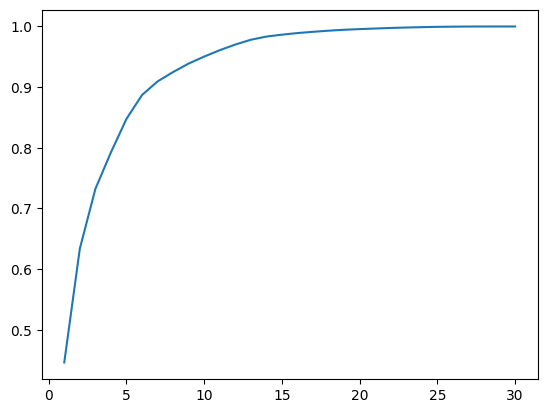

In [78]:
plt.plot(range(1,31),np.cumsum(pre))